In [1]:
import math
from itertools import combinations 

In [2]:
def L_dist(x1,x2,p):
    if len(x1)==len(x2) and len(x1)>1:
        sum = 0
        for i in x1:
            sum+=math.pow(abs(x1[i]-x2[i]),p)
        return math.pow(sum,1/p)
    else:
        return 0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [4]:
x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, bias=5.0,coef = True)

In [5]:
#make_regression??

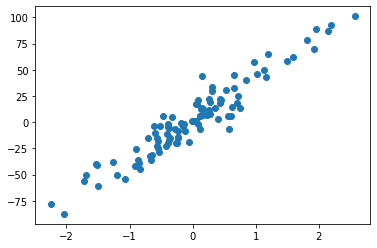

In [6]:
plt.scatter(x_train,y_train)

In [7]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [8]:
w=np.linalg.inv(np.dot(x_train.T,x_train)).dot((x_train.T)).dot(y_train)

In [9]:
w

array([38.54775737])

In [61]:
class LR:
    def __init__(self,fit_intercept = True):
        self.beta = None
        self.fit_intercept = fit_intercept
    def fit(self,X,y):
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]),X]
        pseudo_inverse = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
        self.beta = np.dot(pseudo_inverse,y)
    def predict(self,X):
        if self.fit_intercept:
            X=np.c_[np.ones(X.shape[0]),X]
        return np.dot(X,self.beta)

In [62]:
x_test=np.linspace(-2,2)

In [63]:
lr = LR(fit_intercept=True)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [64]:
#y_pred

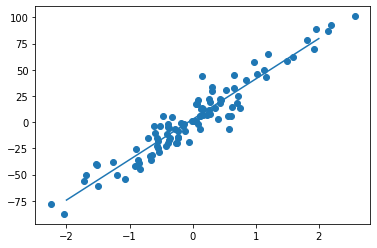

In [65]:
plt.figure
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred)
plt.show()

In [66]:
lr.beta

array([ 2.66606235, 38.52283613])

In [16]:
xx=np.c_[np.ones(x_train.shape[0]),x_train]

In [17]:
#xx

In [18]:
def loss(x,w,b,y):
    """
    目标函数
    :param x: 自变量，标量
    :return: 因变量，标量
    """
    l = 0
    for i in range(len(x)):
        l+= 0.5*(w*x[i]+b-y[i]) *  0.5*(w*x[i]+b-y[i]) 
    return l

In [55]:
def grad_desc(x,y,initial_w,initial_b,alpha,num_iter):
    w = initial_w
    b = initial_b
    # 定义一个list保存所有的损失函数值，用来显示下降过程。
    cost_list=[]
    for i in range(num_iter):
        cost_list.append(loss(x_train,initial_w,initial_b,y_train))
        w,b= step_grad_desc(w,b,alpha,x,y)
    return [w,b,cost_list]

def step_grad_desc(current_w,current_b,alpha,x_train,y_train):
    sum_grad_w=0
    sum_grad_b=0
    M=len(y_train)
    #对每个点代入公式求和
    for i in range(M):
        x= x_train[i]
        y= y_train[i]
        sum_grad_w += (current_w * x +current_b -y) *x
        sum_grad_b +=  current_w * x +current_b -y
    #用公式求当前梯度
    grad_w=2/M * sum_grad_w
    grad_b=2/M * sum_grad_b
    
    #梯度下降，更新当前的w和b
    updated_w = current_w- alpha * grad_w
    updated_b = current_b -alpha * grad_b
    return updated_w,updated_b

In [56]:
w,b,cost_list= grad_desc(x_train,y_train,initial_w=1,initial_b=1,alpha=0.01,num_iter=1000)
print ("w is :",w)
print ("b is :",b)


w is : [38.52283274]
b is : [2.66606247]


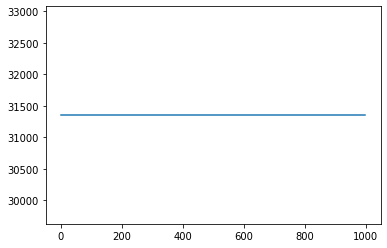

In [57]:
cost = loss(x_train,w[-1],b[-1],y_train)

#print("cost_list:",cost_list)
#print("cost is:",cost)
plt.plot(cost_list)

In [71]:
def grad_desc_vec(x,y,initial_w,alpha,num_iter):
    w = initial_w
    # 定义一个list保存所有的损失函数值，用来显示下降过程。
    for i in range(num_iter):
        w= w-alpha*step_grad_desc_vec(w,alpha,x,y)
    return w

def step_grad_desc_vec(current_w,alpha,x_train,y_train):

    return x_train.T.dot(x_train.dot(current_w)-y_train)*2./len(y_train)

In [73]:
w= grad_desc_vec(x=xx,y=y_train,initial_w=np.array([5,5]),alpha=0.01,num_iter=1000)
print ("w is :",w)

w is : [ 2.66606247 38.52283309]


In [75]:
xx.shape

(100, 2)